## <span style="color:darkblue"><u>Fraudulent Transaction Detection</u></span>

### <span style="color:darkred"><b><u>Business Context</u></b></span>

#### To develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. 

### <span style="color:darkred"><b><u>Problem Domain - "Financial Industry" </u></b></span>

Fraud transaction detection is of utmost importance in the financial industry due to the potential financial losses, reputational damage, and customer trust implications caused by fraudulent activities.

### <span style="color:darkred"><b><u>Column Description</u></b></span>

- step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation). 
<br>
- type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
<br>
- amount - amount of the transaction in local currency.
<br>
- nameOrig - customer who started the transaction
<br>
- oldbalanceOrg - initial balance before the transaction
<br>
- newbalanceOrig - new balance after the transaction
<br>
- nameDest - customer who is the recipient of the transaction
<br>
- oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
<br>
- newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
<br>
- isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
<br>
- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

### Reading the Dataset
Data for the
case is available in CSV format having 6362620 rows and 10 columns.

In [2]:
data = pd.read_csv('Fraud.csv')

In [3]:
data.shape

(6362620, 11)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


***

### Exploratory Data Analysis, Data Preprocessing and Data Visualizations

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.duplicated().sum()

0

#### Checking for null values

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Feature Engineering

In [9]:
data['step'].nunique()

743

To consider the time of the day in which major fraud transactions take place, the column 'step must be used'. But it has total 743 unique values, which may result in high cardinality. It can lead to increased memory usage. So, it may require additional feature engineering to derive meaningful insights from the data.

So, step is converted to 24 hours (of each day), further to time period (morning, evening,..), so that the model doesn't get biased to this feature.

In [10]:
data['hour_of_day'] = (data['step']) % 24

In [11]:
bins = [0, 5, 12, 16, 20, 24]
labels = ['Midnight','Morning', 'Afternoon', 'Evening', 'Night']

# Create a new column with the bin labels based on 'step' values
data['time_of_day'] = pd.cut(data['hour_of_day'], bins=bins, labels=labels, right=False)

In [12]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,time_of_day
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,Midnight
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,Midnight
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,Midnight
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,Midnight
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,Midnight


In [13]:
# 36 is 12 noon
data[data['step'] == 36]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,time_of_day
660051,36,CASH_OUT,36657.51,C297492393,9523.00,0.00,C1020952192,0.00,36657.51,0,0,12,Afternoon
660052,36,CASH_OUT,127512.16,C1280498654,0.00,0.00,C1607998216,353179.00,480691.16,0,0,12,Afternoon
660053,36,CASH_OUT,341056.99,C1615256363,0.00,0.00,C1062254208,3808178.07,4149235.05,0,0,12,Afternoon
660054,36,CASH_OUT,251880.09,C300920446,0.00,0.00,C963801415,2370189.64,2622069.72,0,0,12,Afternoon
660055,36,CASH_OUT,157784.82,C1524821501,0.00,0.00,C424605810,1138738.72,1101343.62,0,0,12,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699820,36,CASH_OUT,36660.11,C1264349678,12488.00,0.00,C977869926,63065.32,99725.43,0,0,12,Afternoon
699821,36,PAYMENT,15548.89,C1662050388,0.00,0.00,M249904392,0.00,0.00,0,0,12,Afternoon
699822,36,CASH_IN,192770.27,C1629227889,25482.00,218252.27,C1202769194,1946233.66,1753463.39,0,0,12,Afternoon
699823,36,CASH_IN,262632.97,C1239926205,218252.27,480885.24,C1344532196,663456.90,400823.93,0,0,12,Afternoon


#### Plots

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb

In [15]:
#collecting only data which is marked as fraud
fraud_data = data[data['isFraud']==1]
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,time_of_day
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,1,Midnight
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,1,Midnight
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,1,Midnight
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,1,Midnight
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,1,Midnight


##### Major Fraud Transactions vs Time Period ! 

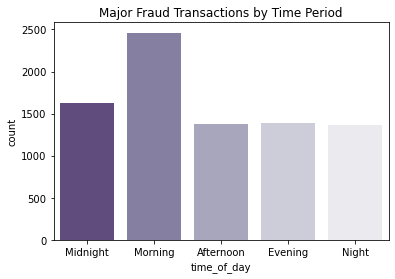

In [16]:
sb.countplot(x = 'time_of_day', data = fraud_data, palette = 'Purples_r', saturation = 0.5)
plt.title('Major Fraud Transactions by Time Period')
plt.show()

To get into deeper picture, checking for each hour of the day.
##### Major Fraud Transactions vs each Hour !

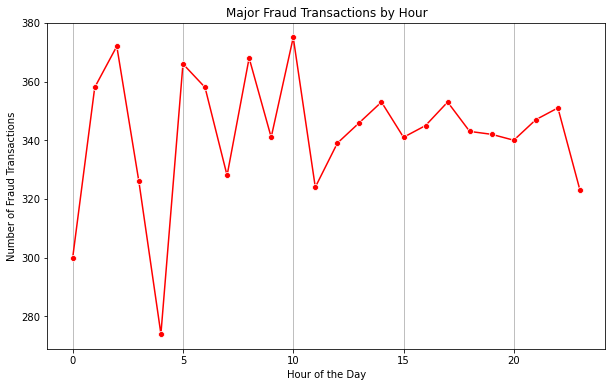

In [17]:
fraud_by_hour = data[data['isFraud'] == 1].groupby('hour_of_day')['isFraud'].count()

plt.figure(figsize = (10, 6))
sb.lineplot(x = fraud_by_hour.index, y = fraud_by_hour.values, marker='o', color = 'red')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraud Transactions')
plt.title('Major Fraud Transactions by Hour')
plt.grid(axis='x')
plt.show()

We can conclude that, the major fraud transactions took place during midnights around 3am, 
and in the morning around 10am. There is a drastic fall during the early hours between 4am to 7am.

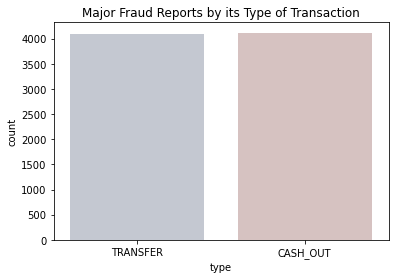

In [18]:
sb.countplot(x = 'type', data = fraud_data, palette = 'vlag', saturation = 0.5)
plt.title('Major Fraud Reports by its Type of Transaction')
plt.show()

The fraud transactions took place only in cashout and transfer type of transactions.
<br>

Considering the description given
- Note that there is not information for customers that start with M (Merchants).



In [19]:
data[data['nameOrig'].str.startswith('M')].shape

(0, 13)

In [20]:
data[data['nameDest'].str.startswith('M')].shape

(2151495, 13)

In [21]:
sum(data[data['nameDest'].str.startswith('M')].isFraud == 1)

0

In [22]:
data['nameDest'] = data['nameDest'].str[0]

In [23]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,time_of_day
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M,0.0,0.0,0,0,1,Midnight
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M,0.0,0.0,0,0,1,Midnight
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C,0.0,0.0,1,0,1,Midnight
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C,21182.0,0.0,1,0,1,Midnight
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M,0.0,0.0,0,0,1,Midnight


As there are merchant transactions only in the nameDest, we consider only that column, but to avoid high cardinality, considering only the starting letter of that column.<br>
where,
- "M" refers to Merchant transactions (transactions related to businesses).
- "C" refers to Customer transactions (transactions related to individual customers).

In [24]:
data['nameDest'].unique()

array(['M', 'C'], dtype=object)


##### Checking for multicollinearity!

<AxesSubplot:>

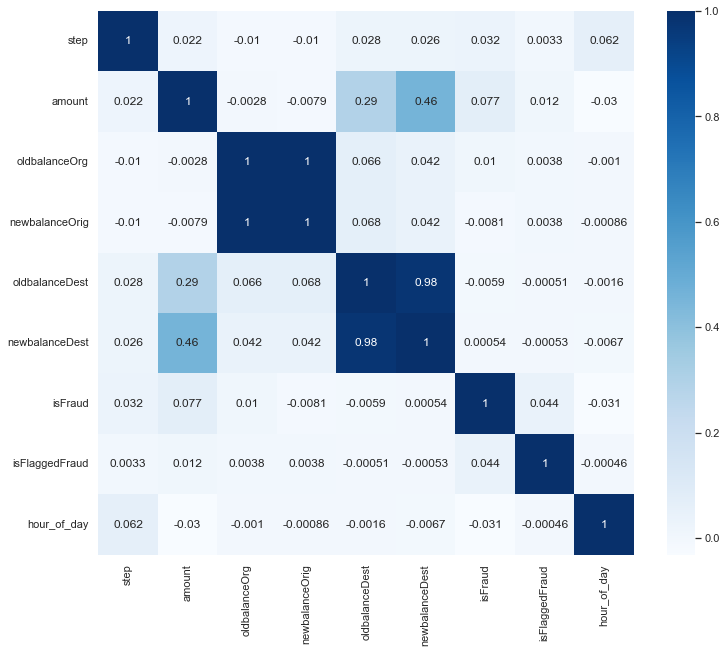

In [25]:
sb.set(rc = {'figure.figsize':(12,10)})
sb.heatmap(data.corr(), cmap="Blues", annot=True)

In [26]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Numeric columns
num = data.select_dtypes(include = ['int64','float64']).columns
# Add a constant term to the independent variables for the VIF calculation
independent_variables_with_const = sm.add_constant(data[num])

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif['Feature'] = independent_variables_with_const.columns
vif['VIF'] = [variance_inflation_factor(independent_variables_with_const.values, i)
              for i in range(independent_variables_with_const.shape[1])]

# Display the VIF DataFrame
print(vif)

          Feature         VIF
0           const   16.088781
1            step    1.007173
2          amount    3.772702
3   oldbalanceOrg  502.987865
4  newbalanceOrig  504.357329
5  oldbalanceDest   66.101080
6  newbalanceDest   76.200777
7         isFraud    1.188155
8  isFlaggedFraud    1.002564
9     hour_of_day    1.005961


In [27]:
data['balance_difference'] = data['newbalanceDest'] - data['oldbalanceDest']
data['balance_difference'] = data['balance_difference'].abs()

In [28]:
data['orgbalance_difference'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['orgbalance_difference'] = data['orgbalance_difference'].abs()

Four columns are highly correlated here,<br>
- oldbalanceOrg with newbalanceOrig  
- oldbalanceDest with newbalanceDest

Here, in some fraud cases, there is no change in new and old balance as per the amount transfered to that account.<br>
So, a new feature 'difference' is created.<br>
But there is no point in having the difference between original account, as it is equal to amount column.<br>
So, any one of the columns can be used, to avoid multicollinearity and to justify the importance of it.<br>

#### Dropping the unwanted columns

In [29]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,time_of_day,balance_difference,orgbalance_difference
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M,0.0,0.0,0,0,1,Midnight,0.0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M,0.0,0.0,0,0,1,Midnight,0.0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C,0.0,0.0,1,0,1,Midnight,0.0,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C,21182.0,0.0,1,0,1,Midnight,21182.0,181.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M,0.0,0.0,0,0,1,Midnight,0.0,11668.14


In [30]:
df = data.drop(['step', 'nameOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'hour_of_day', 'orgbalance_difference'], axis = 1)

In [31]:
df = df[['time_of_day','type', 'amount', 'oldbalanceOrg', 'nameDest', 'balance_difference','isFraud', 'isFlaggedFraud']]

In [32]:
df.head()

,time_of_day,type,amount,oldbalanceOrg,nameDest,balance_difference,isFraud,isFlaggedFraud
0,Midnight,PAYMENT,9839.64,170136.0,M,0.0,0,0
1,Midnight,PAYMENT,1864.28,21249.0,M,0.0,0,0
2,Midnight,TRANSFER,181.00,181.0,C,0.0,1,0
3,Midnight,CASH_OUT,181.00,181.0,C,21182.0,1,0
4,Midnight,PAYMENT,11668.14,41554.0,M,0.0,0,0


In [33]:
df.shape

(6362620, 8)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column              Dtype   
---  ------              -----   
 0   time_of_day         category
 1   type                object  
 2   amount              float64 
 3   oldbalanceOrg       float64 
 4   nameDest            object  
 5   balance_difference  float64 
 6   isFraud             int64   
 7   isFlaggedFraud      int64   
dtypes: category(1), float64(3), int64(2), object(2)
memory usage: 345.9+ MB


#### Type Conversion

In [35]:
for i in ['time_of_day', 'type', 'nameDest', 'isFraud', 'isFlaggedFraud']:
    df[i] = df[i].astype('category')

In [36]:
df.dtypes

time_of_day           category
type                  category
amount                 float64
oldbalanceOrg          float64
nameDest              category
balance_difference     float64
isFraud               category
isFlaggedFraud        category
dtype: object

#### Data description for both numeric and categoric columns

In [37]:
cat = df.select_dtypes(include = ['category']).columns
num = df.select_dtypes(include = ['int64','float64']).columns

In [38]:
df[num].describe().round(2)

,amount,oldbalanceOrg,balance_difference
count,6362620.00,6362620.00,6.362620e+06
mean,179861.90,833883.10,1.858962e+05
std,603858.23,2888242.67,8.011003e+05
min,0.00,0.00,0.000000e+00
25%,13389.57,0.00,0.000000e+00
50%,74871.94,14208.00,6.270585e+04
75%,208721.48,107315.18,2.046755e+05
max,92445516.64,59585040.37,1.056878e+08


In [39]:
df[cat].describe()

,time_of_day,type,nameDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620
unique,5,5,2,2,2
top,Evening,CASH_OUT,C,0,0
freq,2109876,2237500,4211125,6354407,6362604


In [40]:
df.head()

,time_of_day,type,amount,oldbalanceOrg,nameDest,balance_difference,isFraud,isFlaggedFraud
0,Midnight,PAYMENT,9839.64,170136.0,M,0.0,0,0
1,Midnight,PAYMENT,1864.28,21249.0,M,0.0,0,0
2,Midnight,TRANSFER,181.00,181.0,C,0.0,1,0
3,Midnight,CASH_OUT,181.00,181.0,C,21182.0,1,0
4,Midnight,PAYMENT,11668.14,41554.0,M,0.0,0,0


<AxesSubplot:>

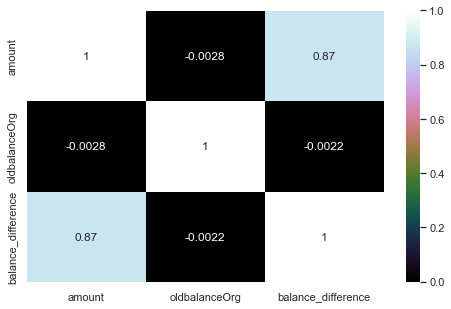

In [41]:
sb.set(rc = {'figure.figsize':(8,5)})
sb.heatmap(df.corr(), cmap="cubehelix", annot=True)

### Splitting Dataset to train and validation 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x = df.drop(['isFraud'], axis=1)
y = df['isFraud']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.30, random_state=123, stratify=y) 

In [44]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(4453834, 7)
(1908786, 7)
(4453834,)
(1908786,)


In [45]:
y_train.value_counts(normalize = True)*100

0    99.87092
1     0.12908
Name: isFraud, dtype: float64

Handling class imbalance is crucial in machine learning, especially when dealing with rare events like fraudulent transactions. <br>When the majority class (non-fraudulent transactions, labeled as 0) significantly outweighs the minority class (fraudulent transactions, labeled as 1), the model may become biased towards the majority class and perform poorly in detecting the minority class.

#### Standardizing the Data

- Numeric Data - StandardScaler
- Categoric Data - OneHotEncoder

In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [47]:
scaler = StandardScaler()

In [48]:
numerical_list = x_train.select_dtypes(include=['int64','float64']).columns

In [49]:
scaler.fit(x_train[numerical_list])

StandardScaler()

In [50]:
scaled_train = pd.DataFrame(scaler.transform(x_train[numerical_list]), columns = numerical_list)

In [51]:
scaled_train.head()

,amount,oldbalanceOrg,balance_difference
0,0.180900,0.280806,0.128371
1,0.282869,-0.215301,-0.118043
2,-0.248299,-0.288758,-0.194384
3,-0.133133,-0.285457,-0.107779
4,-0.057355,-0.264636,-0.050795


In [52]:
scaled_valid = pd.DataFrame(scaler.transform(x_valid[numerical_list]), columns = numerical_list)

In [53]:
categorical_list = x_train.select_dtypes(include=['category']).columns

In [54]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [55]:
ohe.fit(x_train[categorical_list])

OneHotEncoder(handle_unknown='ignore')

In [56]:
x_train_ohe = pd.DataFrame(ohe.transform(x_train[categorical_list]).toarray() , columns = ohe.get_feature_names_out())
x_valid_ohe = pd.DataFrame(ohe.transform(x_valid[categorical_list]).toarray() , columns = ohe.get_feature_names_out())

In [57]:
x_train_ohe.head()

,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Midnight,time_of_day_Morning,time_of_day_Night,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C,nameDest_M,isFlaggedFraud_0,isFlaggedFraud_1
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [58]:
x_train_ohe.shape

(4453834, 14)

In [59]:
x_train = pd.concat([scaled_train, x_train_ohe], axis = 1)

In [60]:
x_valid = pd.concat([scaled_valid, x_valid_ohe], axis = 1)

In [61]:
x_train.shape

(4453834, 17)

In [62]:
x_valid.shape

(1908786, 17)

In [63]:
x_train.head()

,amount,oldbalanceOrg,balance_difference,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Midnight,time_of_day_Morning,time_of_day_Night,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C,nameDest_M,isFlaggedFraud_0,isFlaggedFraud_1
0,0.180900,0.280806,0.128371,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.282869,-0.215301,-0.118043,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.248299,-0.288758,-0.194384,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.133133,-0.285457,-0.107779,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.057355,-0.264636,-0.050795,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


***

### Model Building

In [64]:
scores = pd.DataFrame(columns=['Model', 'Train_Accuracy',
                               'Valid_Accuracy'])

def get_metrics(train_actual, train_predicted, valid_actual, valid_predicted, model_description, dataframe):

    train_accuracy  = accuracy_score(train_actual, train_predicted)
    valid_accuracy   = accuracy_score(valid_actual, valid_predicted)
   
    dataframe       = dataframe.append(pd.Series([model_description, 
                                                  train_accuracy,valid_accuracy],
                                                 index=scores.columns ), 
                                       ignore_index=True)

    return(dataframe)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [66]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))  
    print("F1 Score:", f1_score(act, pred))
    print("ROC AUC Score:", roc_auc_score(act, pred))

#### Logistic Regression

#### Model 1

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
LR1 = LogisticRegression(class_weight = 'balanced', random_state = 42)

In [69]:
LR1.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [70]:
pred_train1 = LR1.predict(x_train)
pred_valid1 = LR1.predict(x_valid)

In [71]:
print("--Train--")
evaluate_model(y_train, pred_train1)
print("--Valid--")
evaluate_model(y_valid, pred_valid1)

--Train--
Confusion Matrix 
 [[4171389  276696]
 [    416    5333]]
Accurcay :  0.9377812464496881
Recall   :  0.927639589493825
Precision:  0.018909402933740858
F1 Score: 0.03706329184301788
ROC AUC Score: 0.9327169718467205
--Valid--
Confusion Matrix 
 [[1787439  118883]
 [    180    2284]]
Accurcay :  0.9376237042811504
Recall   :  0.926948051948052
Precision:  0.01885001691879802
F1 Score: 0.036948661743413866
ROC AUC Score: 0.9322927774756087


#### Decision Tree

#### Model 2

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtclf1 = DecisionTreeClassifier()

In [73]:
dtclf1.fit(x_train, y_train)

DecisionTreeClassifier()

In [74]:
pred_train_dt1 = dtclf1.predict(x_train)
pred_valid_dt1 = dtclf1.predict(x_valid)

In [75]:
print("--Train--")
evaluate_model(y_train, pred_train_dt1)
print("--Valid--")
evaluate_model(y_valid, pred_valid_dt1)

--Train--
Confusion Matrix 
 [[4448085       0]
 [      0    5749]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
F1 Score: 1.0
ROC AUC Score: 1.0
--Valid--
Confusion Matrix 
 [[1905806     516]
 [    444    2020]]
Accurcay :  0.9994970625308442
Recall   :  0.8198051948051948
Precision:  0.7965299684542587
F1 Score: 0.8079999999999999
ROC AUC Score: 0.9097672582521286


#### Model 3

In [76]:
dtclf2 = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)

In [77]:
dtclf2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [78]:
pred_train_dt2 = dtclf2.predict(x_train)
pred_valid_dt2 = dtclf2.predict(x_valid)

In [79]:
print("--Train--")
evaluate_model(y_train, pred_train_dt2)
print("--Valid--")
evaluate_model(y_valid, pred_valid_dt2)

--Train--
Confusion Matrix 
 [[4448085       0]
 [      0    5749]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
F1 Score: 1.0
ROC AUC Score: 1.0
--Valid--
Confusion Matrix 
 [[1905956     366]
 [    428    2036]]
Accurcay :  0.9995840288015524
Recall   :  0.8262987012987013
Precision:  0.8476269775187344
F1 Score: 0.8368269625976161
ROC AUC Score: 0.9130533542751809


### Model 4 (Final)

##### Assigning Class Weights manually

In [80]:
class_weights = {0: 1.0, 1: 2700.0}

##### Instantiate

In [81]:
dtclf3 = DecisionTreeClassifier(class_weight=class_weights, random_state=42)

##### Train

In [82]:
dtclf3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 2700.0}, random_state=42)

##### Predict

In [83]:
pred_train_tuned3 = dtclf3.predict(x_train)
pred_valid_tuned3 = dtclf3.predict(x_valid)

##### Evaluate

In [84]:
print("--Train--")
evaluate_model(y_train, pred_train_tuned3)
print("--Valid--")
evaluate_model(y_valid, pred_valid_tuned3)

--Train--
Confusion Matrix 
 [[4448085       0]
 [      0    5749]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
F1 Score: 1.0
ROC AUC Score: 1.0
--Valid--
Confusion Matrix 
 [[1905969     353]
 [    404    2060]]
Accurcay :  0.9996034128498428
Recall   :  0.836038961038961
Precision:  0.8537090758392043
F1 Score: 0.8447816280500308
ROC AUC Score: 0.9179268938525901


***

### Conclusion

Models Built : <br>
- Logistic Regression
- Decision Tree Classifier
<br>

The major concern is to reduce the number of false positives. While preventing fraud is critical, an excessively high false positive rate could lead to operational inefficiencies. So, Decision Tree is built with some class weights assigned manually so as to tackle class imbalance as well as target in improving false positives, without overfitting or underfitting. There aint a greater change with a threshold given as hyper parameter.<br>

Though Logistic could give good accuracy, the recall and precision scores were too low.<br>
Even XG Boost could not give less false positives, instead took high computational power.<br>
But, Decision Tree Classifier worked decent enough for this case, with accuracy of 99% for both train and validation datasets.

***

### Elaboration

- Started off with data cleaning, while understanding and exploring the data. There were no duplicates nor any missing values in the data to handle. 
- Many independent variables were highly correlated. Multicollinearity need not be a primary concern for classification problem, unlike a regression problem. But because it can increase the risk of overfitting, handled it by some feature engineering and removing unwanted columns which the features already justified. 
- Removed the names of customers which has many unique values and can result in high cardinality, extracting the details if it was a merchant or customer's transaction, it is important as there were no fraud cases in merchant transactions, which indeed is the reason for no fraud cases in payment type. Converted 'step' column to time period of the day, to avoid bias in the model due to its range of unique values. All the columns were properly utilised, either as it is, or by new feature extraction.
- Amongst all, my decision tree model gave the best results, i.e., by assigning class weights so as to handle class imbalance. If the dataset is imbalanced, and the majority class (non-fraudulent transactions) dominates the data, the model may be biased towards predicting the majority class and perform poorly on the minority class (fraudulent transactions). So, I both used inbuilt as well as assigned weights as hyperparameter. In the process of validating continuously, landed up at one weight, which gave a decent results.
- Used Accuracy, Recall, Precision, F1 Score and ROC AUC Score, as evaluation metrics, and developed a promising model.
- Amount transacted, type of transaction(only cash-out and transfer has fraud cases), difference between old and new balance at receivers end might play a major role in this particular dataset.
- Yes, the factors makes sense because some times high amount and sudden transactions can be suspicious. Type :- cash in & payments - there is no point in fraudulent transactions either while crediting amount into an account or paying. 
- When a company updates its infrastructure, especially in the context of fraud prevention, it is essential to take several preventive measures to ensure the security and integrity of the system, like, Data Encryption, Access Control, Two Step Verification, Regular Security Audits and Testing and most importantly Training and Awarness.
- Continuous monitoring of security incidents and attempted fraud activities, keeping track of any security breaches or unauthorized access attempts can help analyzing the effectiveness of the implemented measures in detecting these incidents.

### Thank You!